In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import pandas ,numpy and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

## Reading Data from CSV file
Import and read the `Uber Request Data.csv` and store it in `request_data` variable. 

In [3]:
request_data = pd.read_csv("Uber Request Data.csv", encoding = "ISO-8859-1")
request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Standardising Values
Standardising date format of `Request timestamp` column.

In [4]:
request_data['Request timestamp'] = pd.to_datetime(request_data['Request timestamp'])
request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


## Adding Column
Adding a new column `slot` in `request_data` based on time.

In [5]:
request_data = request_data.assign(slot=pd.cut(request_data['Request timestamp'].dt.hour,
                                      [-1, 3, 7, 11, 15, 19, 23],labels=['Late Night', 'Early Morning', 'Morning', 'AfterNoon', 'Evening', 'Night']))
request_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,Morning


## Cleaning Data
Removing `Request id`, `Driver id`, `Status`, `Request timestamp`, `Drop timestamp`

In [6]:
request_data.drop('Request id', axis=1, inplace=True)
request_data.drop('Driver id', axis=1, inplace=True)
request_data.drop('Request timestamp', axis=1, inplace=True)
request_data.drop('Drop timestamp', axis=1, inplace=True)
request_data.head()

,Pickup point,Status,slot
0,Airport,Trip Completed,Morning
1,Airport,Trip Completed,Evening
2,City,Trip Completed,Morning
3,Airport,Trip Completed,Night
4,City,Trip Completed,Morning


## Visualisation of data
Showing a bar graph comparing trip cancellations and No availability of cars during different time slots in
trip city to airport and trip airport to city. 

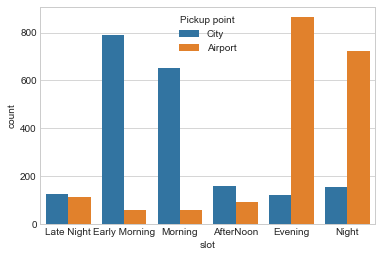

In [7]:
sns.countplot(x='slot', data=request_data.loc[request_data.Status != 'Trip Completed'], hue='Pickup point')
plt.show()

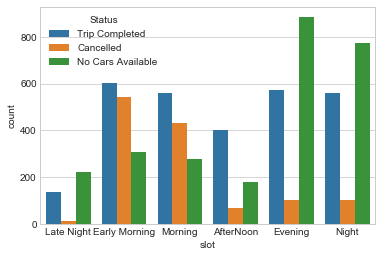

In [8]:
# Comparing status of the trips in different time slots.

sns.countplot(x='slot', data=request_data, hue='Status')
plt.show()

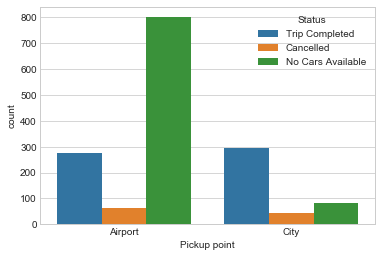

In [9]:
# The above graph cleary shows that evening slot has the maximum gap in supply and demand.

sns.countplot(x='Pickup point', data=request_data.loc[request_data.slot == 'Evening'], hue='Status')
plt.show()